<p style="color: #000000; font-size: 32px; font-weight: bold; text-align: center; margin-top: 20px;">
Glucose Tolerance Studies
</p>
<p style="color: #000000; font-size: 24px; text-align: center; margin-bottom: 20px;">
Statistical Analysis
</p>

#### In the research department of a hospital, a **study is being conducted to determine whether glucose tolerance in healthy patients tends to decrease as a person's age increases**, meaning it takes longer to disappear from our bodies as we age. The glucose tolerance test, also known as the **"oral glucose tolerance test"**, measures the body's response to sugar (glucose). It can be used as a **screening test for type 2 diabetes**.

#### To obtain the study's conclusions, **blood glucose measurement was performed at the time of intake (baseline level) of 100 grams of glucose**, in the form of an oral preparation, **and 60 minutes after intake, on two samples of randomly selected healthy patients divided by age: young (<30 years) and adults (>30 years)**. We will consider these samples independent.

#### The data has a total of 65 records, which are recorded in an Excel file named `'muestra_glucosa.xlsx'`.

#### Data Description
| Variable               | Description                                                                        | Possible values / example      |
| ---------------------- | ---------------------------------------------------------------------------------- | ------------------------------ |
| **Control Group**      | Indicates the patient's age range.                                                 | 1 = Young (<30 years) / 2 = Adult (>30 years) |
| **Baseline Glucose Level** | Blood glucose level (mg/dL) at the time of ingesting 100 g of glucose.              | 89, 94, 102                    |
| **60-min Glucose Level**   | Blood glucose level (mg/dL) measured 60 minutes after intake.                      | 119, 134, 145                  |

#1. Importing libraries.

In [51]:
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

### Load the DataFrame.

In [52]:
path='glucose_sample.xlsx'
df=pd.read_excel(
    path,
    names=['group', 'basal_glucose', 'glucose_60min'],
    header=0 )
df

,group,basal_glucose,glucose_60min
0,1,90,159
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141
...,...,...,...
60,2,95,169
61,2,99,172
62,2,88,173
63,2,84,188


# Part I
## Descriptive Analysis of Glucose Levels


### a) Centralization and dispersion measures by control groups.

In [53]:
# Create variables to group by age
g1 = df[df['group'] == 1]
g2 = df[df['group'] == 2]

print(f"Total records in Control Group 1: {len(g1)}\nTotal records in Control Group 2: {len(g2)}")

Total records in Control Group 1: 35
Total records in Control Group 2: 30


In [54]:
# Create variables for Baseline Glucose by group
# Variable for Baseline Glucose of Group 1
g1_before = g1['basal_glucose']

# Variable for Baseline Glucose of Group 2
g2_before = g2['basal_glucose']

In [55]:
# Central tendency measures at baseline 'G1'
g1_mean = round(g1_before.mean(), 2)
g1_median = g1_before.median()
g1_mode = g1_before.mode().tolist()

# Dispersion measures at baseline 'G1'
g1_ran = np.ptp(g1_before)
g1_var = round(g1_before.var(), 2)
g1_std = round(g1_before.std(), 2)
g1_iqr = g1_before.quantile(0.75) - g1_before.quantile(0.25)

In [56]:
# Central tendency measures at baseline 'G2'
g2_mean = round(g2_before.mean(), 2)
g2_median = g2_before.median()
g2_mode = g2_before.mode().tolist()

# Dispersion measures 'G2'
g2_ran = np.ptp(g2_before)
g2_var = round(g2_before.var(), 2)
g2_std = round(g2_before.std(), 2)
g2_iqr = g2_before.quantile(0.75) - g2_before.quantile(0.25)

In [57]:
# Show results
measures = pd.DataFrame({
    'mean': [g1_mean, g2_mean],
    'median': [g1_median, g2_median],
    'mode': [g1_mode, g2_mode],
    'range': [g1_ran, g2_ran],
    'variance': [g1_var, g2_var],
    'standard_deviation': [g1_std, g2_std],
    'iqr': [g1_iqr, g2_iqr]
}, index=['group_1', 'group_2'])

print("Results of central tendency and dispersion measures of 'Baseline Glucose' by control groups:\n")
display(measures)
print('Glucose levels are expressed in mg/dL.')

Results of central tendency and dispersion measures of 'Baseline Glucose' by control groups:



,mean,median,mode,range,variance,standard_deviation,iqr
group_1,84.69,82.0,"[75, 79, 82, 90]",38,78.22,8.84,12.0
group_2,89.40,90.0,[88],27,53.97,7.35,9.5


Glucose levels are expressed in mg/dL.


**Adults (g2) have on average higher baseline glucose** than young people (g1). The **distribution of the mean in adults (g2) is more symmetric** than that of young people (g1). The **young group (g1) is multimodal with 4 modes**, and the adult group (g2) is not. The **range is greater in young people (g1)**. The **variance, standard deviation and IQR are lower in adults (g2)**.

#### Is the mean representative for each group?

To evaluate whether the mean is representative of the data, the **coefficient of variation (CV)** is calculated, which expresses the relative dispersion as a percentage of the mean.

- If CV ≤ 30% → the mean is representative (low relative dispersion)
- If CV > 30% → the mean may not be representative (high relative dispersion)

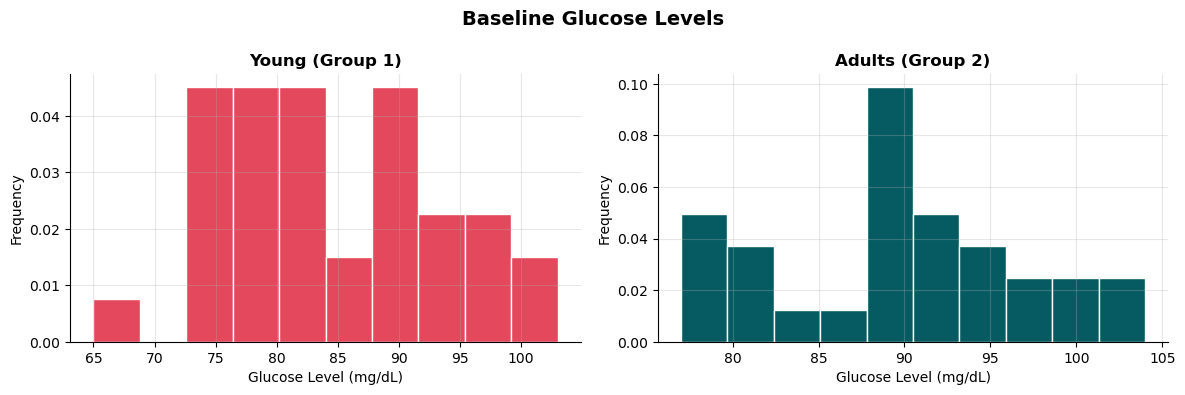

In [58]:
# Hist. of Baseline Glucose in both groups
# g1_before and g2_before
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Group 1
g1_plot = g1_before.plot(kind='hist', ax=ax1, color='#E4485C', edgecolor='white', density=True)
g1_plot.set_xlabel('Glucose Level (mg/dL)', fontsize=10)
g1_plot.set_ylabel('Frequency', fontsize=10)
g1_plot.set_title('Young (Group 1)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)


# Group 2
g2_plot = g2_before.plot(kind='hist', ax=ax2, color='#065B62', edgecolor='white', density=True)
g2_plot.set_xlabel('Glucose Level (mg/dL)', fontsize=10)
g2_plot.set_ylabel('Frequency', fontsize=10)
g2_plot.set_title('Adults (Group 2)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)


fig.suptitle('Baseline Glucose Levels', fontsize=14, fontweight='bold')
fig.tight_layout(pad=1.2)
sns.despine(top=True, right=True)
plt.show()

**In the young group we can graphically see the 4 existing modes (with 4 records each), in adults only one mode is seen (with 10 records). Baseline glucose levels are higher and more concentrated in the adult group.**

In [59]:
# Calculation of CV for 'G1'
g1_cv = round((g1_std / g1_mean) * 100, 2)

# Calculation of CV for 'G2'
g2_cv = round((g2_std / g2_mean) * 100, 2)

print('Coefficients of Variation')
print(f"Young Group (g1): {g1_cv}")
print(f"Adult Group (g2): {g2_cv}")

Coefficients of Variation
Young Group (g1): 10.44
Adult Group (g2): 8.22


#### Results:      
**The mean IS representative for Group 1**.       
**The mean IS representative for Group 2**.      


Although the **young group (g1) presents a multimodal distribution** (75, 79, 82, 90), with four subgroups which is not surprising, because bodies are still developing, **the mean is still representative** since it does not deviate significantly from the modes and the CV is below 15%.

The **adult group (g2)** shows an **even more representative mean** (CV = 8.22%), with a unimodal distribution (mode at 88) and close values between the mean (89.40) and mode.

Adults present more homogeneous, higher baseline glucose levels and with a more representative mean than young people.

### b) Control Group 2 (adults): skewness and kurtosis in Baseline Glucose.

**Shape measures**

In [60]:
# Skewness
g2_skewness = ss.skew(g2['basal_glucose']) 
print(f"Skewness: {round(g2_skewness, 3)}")

Skewness: -0.007


**The skewness is -0.007**, very close to zero. This shows that the **distribution of baseline glucose in group 2 is almost completely symmetric**.

In [61]:
# Kurtosis
g2_kurtosis = ss.kurtosis(g2['basal_glucose'])
print(f"Kurtosis: {round(g2_kurtosis, 3)}")

Kurtosis: -0.709


**The kurtosis is -0.709**, indicating a **platykurtic distribution**. This means that the data in group 2 present **fewer extreme values and a more uniform distribution** than the standard normal distribution.

### c) Control Group 1 (young): quartiles, box plots, and outliers.

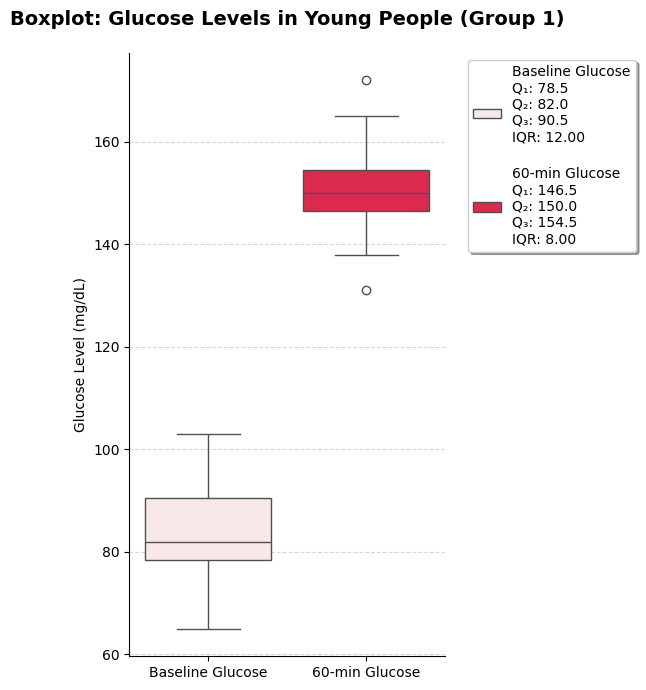

In [62]:
# 'G1' 'Baseline Glucose'
#g1_before (already created)
# 'G1' '60-min Glucose'
g1_after = g1['glucose_60min']

g1_box = pd.DataFrame({
    'values': pd.concat([g1_before, g1_after]),
    'moment': ['Baseline Glucose'] * len(g1_before) + ['60-min Glucose'] * len(g1_after)
})


# boxplot
plt.figure(figsize=(6, 7))

sns.boxplot(
    x='moment',
    y='values',
    hue='moment',
    data=g1_box,
    palette=['#fbe7e5', '#F90D3E']
    #palette=['#bA9CCC', '#9041c1']
)

plt.title('Boxplot: Glucose Levels in Young People (Group 1)', fontsize=14, fontweight='bold', pad=20)
plt.ylabel('Glucose Level (mg/dL)')
plt.xlabel('')
plt.grid(True, which='both', axis='y', linestyle='--', alpha=0.5)
sns.despine(top=True, right=True)
legend = (['Baseline Glucose\nQ₁: 78.5\nQ₂: 82.0\nQ₃: 90.5\nIQR: 12.00\n',
            '60-min Glucose\nQ₁: 146.5\nQ₂: 150.0\nQ₃: 154.5\nIQR: 8.00'])
plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True)

plt.tight_layout()
plt.show()

# Quartile and IQR Calculations
#print(f"Baseline Glucose\n Quartiles: {g1_before.quantile([0.25, 0.50, 0.75]).tolist()} | IQR: {g1_before.quantile(0.75) - g1_before.quantile(0.25):.2f}")
#print(f"60-min Glucose\n Quartiles: {g1_after.quantile([0.25, 0.50, 0.75]).tolist()} | IQR: {g1_after.quantile(0.75) - g1_after.quantile(0.25):.2f}")


**Exploration of Quartiles and Interquartile Range in Control Group 1 (young)**
<table style="border-collapse: collapse; width: 100%; border: 2px solid white; font-family: Arial, sans-serif;">
<thead>
<tr style="border: 2px solid white; background-color: #f4f4f4;">
<th style="border: 1px solid white; padding: 12px; text-align: center; font-weight: bold;"></th>
<th style="border: 1px solid white; padding: 12px; text-align: center; font-weight: bold;">Q₁ (25%)</th>
<th style="border: 1px solid white; padding: 12px; text-align: center; font-weight: bold;">Q₂ (Median)</th>
<th style="border: 1px solid white; padding: 12px; text-align: center; font-weight: bold;">Q₃ (75%)</th>
<th style="border: 1px solid white; padding: 12px; text-align: center; font-weight: bold;">IQR</th>
</tr>
</thead>
<tbody>
<tr style="border: 1px solid white;">
<td style="border: 1px solid white; padding: 12px; font-weight: bold; background-color: #f4f4f4; color: #E4485C; ">Baseline Glucose</td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">78.5 mg/dL </td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">82.0 mg/dL </td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">90.5 mg/dL </td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">12.0</td>
</tr>
<tr style="border: 1px solid white;">
<td style="border: 1px solid white; padding: 12px; font-weight: bold; background-color: #f4f4f4; color:#F90D3E;">60-min Glucose</td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">146.5 mg/dL </td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">150.0 mg/dL </td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">154.5 mg/dL </td>
<td style="border: 1px solid white; padding: 12px; text-align: center;">8.0</td>
</tr>
</tbody>
</table>

**Baseline Glucose Level**

- **Q₁ = 78.50 mg/dL**: 25% of young people have a baseline glucose level below 78.50 mg/dL
- **Q₂ (Median) = 82.00 mg/dL**: 50% of young people have a baseline level below 82.00 mg/dL, representing the central value of the distribution
- **Q₃ = 90.50 mg/dL**: 75% of young people have a baseline level below 90.50 mg/dL

**Glucose Level after 60 minutes**

- **Q₁ = 146.50 mg/dL**: 25% of young people have a level below 146.50 mg/dL
- **Q₂ (Median) = 150.00 mg/dL**: 50% of young people have a level below 150.00 mg/dL
- **Q₃ = 154.50 mg/dL**: 75% of young people have a level below 154.50 mg/dL

**The boxplot** illustrates in the **60-min glucose an outlier below Q₁, approximately 131 mg/dL, and another above Q₃, approximately 171 mg/dL**, that is, outside the whiskers. **In baseline glucose, no outliers are observed**. This shows that the presence of outliers is determined by the global dispersion of the data, not solely by the IQR. Although 60-minute glucose has lower central dispersion (IQR=8.0 vs 12.0), it presents extreme values due to observations particularly far from the interquartile range.

### d) Study of normality of 60-minute glucose data for both groups
#### Histograms and QQ-plot graphs to visualize deviations from normality
#### Calculation of skewness and kurtosis to evaluate the shape of the distribution
#### Shapiro-Wilk test (appropriate for small samples: n < 50)

In [63]:
# Variable 'G1' with 'glucose_60min' (created previously)
# g1_after
# Create variable for 'G2' with 'glucose_60min'
g2_after = g2['glucose_60min']

#### Histograms

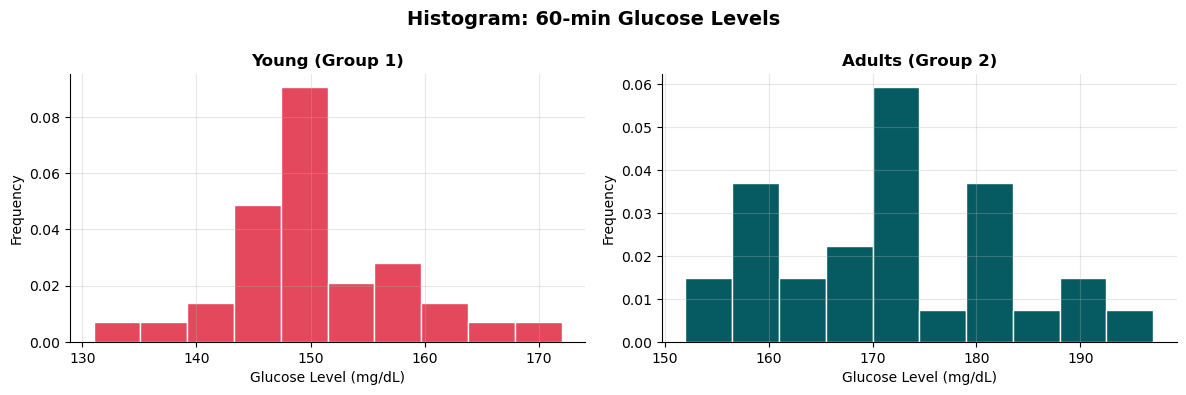

In [64]:
# Histogram of 60-min Glucose for both groups
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Group 1
g1_after_plot = g1_after.plot(kind='hist', ax=ax1, color='#E4485C', edgecolor='white', density=True)
g1_after_plot.set_xlabel('Glucose Level (mg/dL)', fontsize=10)
g1_after_plot.set_ylabel('Frequency', fontsize=10)
g1_after_plot.set_title('Young (Group 1)', fontsize=12, fontweight='bold') 
ax1.grid(True, alpha=0.3)

# Group 2
g2_after_plot = g2_after.plot(kind='hist', ax=ax2, color='#065B62', edgecolor='white', density=True)
g2_after_plot.set_xlabel('Glucose Level (mg/dL)', fontsize=10)
g2_after_plot.set_ylabel('Frequency', fontsize=10)
g2_after_plot.set_title('Adults (Group 2)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)


fig.suptitle('Histogram: 60-min Glucose Levels', fontsize=14, fontweight='bold')
fig.tight_layout(pad=1.2)
sns.despine(top=True, right=True)
plt.show()

Both have a **unimodal distribution**, with a symmetric shape. **Adults have higher values and greater dispersion** with values around 150 and 200, compared to young people with values between approximately 130 and 170.

#### Probability Plots (QQ-plots)

Group 1 Glucose at 60 min
Skewness: 0.348
Kurtosis: 1.086

Group 2 Glucose at 60 min
Skewness: 0.233
Kurtosis: -0.554


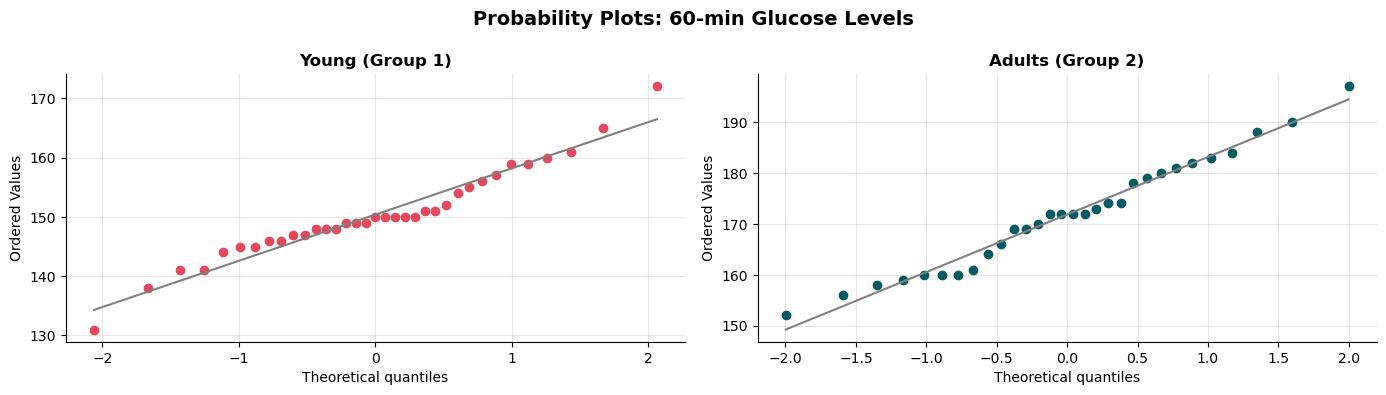

In [65]:
# Probability Plots (QQ-plots)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Variables to plot
g1_after_nor = g1_after
g2_after_nor = g2_after# Skewness
g1_after_skewness = ss.skew(g1_after) 
print(f"Group 1 Glucose at 60 min\nSkewness: {round(g1_after_skewness, 3)}")
# Kurtosis
g1_after_kurtosis = ss.kurtosis(g1_after)
print(f"Kurtosis: {round(g1_after_kurtosis, 3)}")

# Skewness
g2_after_skewness = ss.skew(g2_after) 
print(f"\nGroup 2 Glucose at 60 min\nSkewness: {round(g2_after_skewness, 3)}")
# Kurtosis
g2_after_kurtosis = ss.kurtosis(g2_after)
print(f"Kurtosis: {round(g2_after_kurtosis, 3)}")

# Group 1
ss.probplot(g1_after_nor, dist='norm', plot=ax1)
ax1.set_title('Young (Group 1)', fontsize=12, fontweight='bold')
lines_g1 = ax1.get_lines()
lines_g1[0].set_color('#E4485C')
lines_g1[1].set_color('grey')
ax1.grid(True, alpha=0.3)


# Group 2
ss.probplot(g2_after_nor, dist='norm', plot=ax2)
ax2.set_title('Adults (Group 2)', fontsize=12, fontweight='bold')
lines_g2 = ax2.get_lines()
lines_g2[0].set_color('#065B62')
lines_g2[1].set_color('grey')
ax2.grid(True, alpha=0.3)

fig.suptitle('Probability Plots: 60-min Glucose Levels', fontsize=14, fontweight='bold')
fig.tight_layout(pad=1.2)
sns.despine(top=True, right=True)
plt.show()

**Adults** (with points closer to the line) **have a normality more closely aligned with normality** than young people, who have a small deviation in both extreme values; the normality is also good.

#### Skewness and Kurtosis

In [66]:
# Skewness
g1_after_skewness = ss.skew(g1_after) 
print(f"Group 1 Glucose at 60 min\nSkewness: {round(g1_after_skewness, 3)}")
# Kurtosis
g1_after_kurtosis = ss.kurtosis(g1_after)
print(f"Kurtosis: {round(g1_after_kurtosis, 3)}")

# Skewness
g2_after_skewness = ss.skew(g2_after) 
print(f"\nGroup 2 Glucose at 60 min\nSkewness: {round(g2_after_skewness, 3)}")
# Kurtosis
g2_after_kurtosis = ss.kurtosis(g2_after)
print(f"Kurtosis: {round(g2_after_kurtosis, 3)}")

Group 1 Glucose at 60 min
Skewness: 0.348
Kurtosis: 1.086

Group 2 Glucose at 60 min
Skewness: 0.233
Kurtosis: -0.554


For both groups **the skewness is within normality**. In **kurtosis for young people it indicates that the distribution is leptokurtic, more peaked** (shown in the histogram) and for **adults it is platykurtic**, flatter. The results are within acceptable ranges.

#### Shapiro-Wilk (Normality Test)
We have 35 samples for the young group and 30 for the adult group. Since we have few data, it is convenient to perform the Shapiro-Wilk test.

In [67]:
# Shapiro-Wilk G1 at 60 min
print('Shapiro-Wilk Test: \nYoung (Group 1)')

stat, p_value = ss.shapiro(g1_after)
print('Statistic=%.3f, p-value=%.3f' % (stat, p_value))
alpha = 0.05

if p_value > alpha:
    print("The data follow a normal distribution")
else:
    print("The data do NOT follow a normal distribution")

Shapiro-Wilk Test: 
Young (Group 1)
Statistic=0.963, p-value=0.273
The data follow a normal distribution


In [68]:
# Shapiro-Wilk G2 at 60 min
print('Shapiro-Wilk Test: \nAdults (Group 2)')

stat, p_value = ss.shapiro(g2_after)
print('Statistic=%.3f, p-value=%.3f' % (stat, p_value))
alpha = 0.05

if p_value > alpha:
    print("The data follow a normal distribution")
else:
    print("The data do NOT follow a normal distribution")

Shapiro-Wilk Test: 
Adults (Group 2)
Statistic=0.978, p-value=0.759
The data follow a normal distribution


#### Do the data follow a normal distribution in the 60-minute glucose level for both groups?
**Yes, it is proven that both groups follow a normal distribution**; the normality hypothesis is not rejected.

# Part II  
## Glucose Regression and Prediction

### Young Group (group 1)

#### Study of the relationship between baseline glucose and glucose after intake (60 min)

### a) Linear relationship between baseline glucose and 60-min glucose.

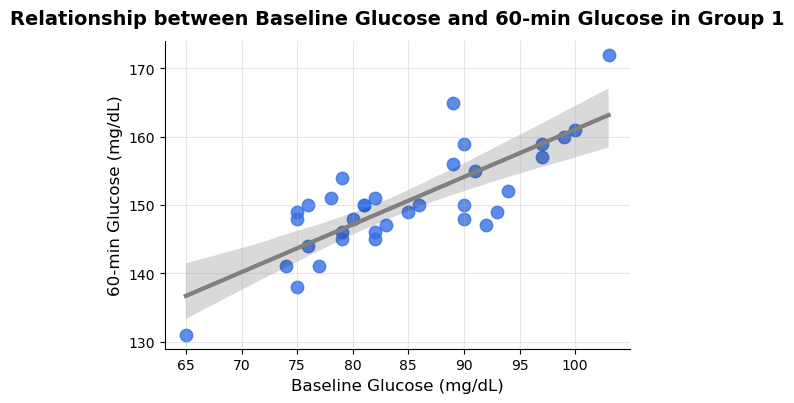

In [69]:
# Relationship graph
# Scatter plot G1
g1_before
g1_after
plt.figure(figsize=(6, 4))
plt.scatter(g1_before, g1_after, color='#366FE5', alpha=0.8, s=80)

# Line
m, b = np.polyfit(g1_before, g1_after, 1)  # m=slope b=intercept
x_line = np.array([min(g1_before), max(g1_before)])
y_line = m * x_line + b
sns.regplot(x=g1_before, y=g1_after, scatter=False, color="black")

plt.plot(x_line, y_line, color='gray', linewidth=3, label=f'y = {m:.2f}x + {b:.2f}')
plt.xlabel('Baseline Glucose (mg/dL)', fontsize=12)
plt.ylabel('60-min Glucose (mg/dL)', fontsize=12)
plt.title('Relationship between Baseline Glucose and 60-min Glucose in Group 1', fontsize=14, fontweight='bold', pad=12)

plt.grid(True, alpha=0.3)
sns.despine(top=True, right=True)
plt.show()

The points show some dispersion around the trend line, but they do not stray far and follow an upward linear pattern. The confidence band (shaded gray area) is relatively narrow, suggesting that the linear model has a reasonable fit.

There are two very pronounced values that do not follow the line, one at ~65, 131 with very low baseline glucose and another at ~102, 172 with a very high response, both being outliers. The data are in a range for baseline glucose of approximately 65-102 mg/dL and 60-min glucose of approximately 131-172 mg/dL.

We can see that the higher the baseline glucose level, the higher the glucose level after intake (at 60 min). The **relationship is positive** between both variables. Remember that group 1 is young people, with bodies still developing, so this variability in the data is to be expected.

In [70]:
# Pearson correlation and P-value between baseline glucose and 60-min glucose
g1_r, p_value = ss.pearsonr(g1_before, g1_after)

alpha = 0.05

print(f"P-Value: {p_value:.8f}")
print(f"Pearson r coefficient: {g1_r:.3f}")

if p_value < alpha:
    print("There is a significant correlation between baseline glucose and 60-min glucose.")
else:
    print("There is no significant correlation between baseline glucose and 60-min glucose.")

P-Value: 0.00000001
Pearson r coefficient: 0.796
There is a significant correlation between baseline glucose and 60-min glucose.


After obtaining the **Pearson correlation coefficient of r = 0.796** we can confirm that there is a positive linear relationship between the two glucose measurements. With the **p-value** practically **at 0**, we confirm that the results are not due to chance. **Young people with high baseline glucose levels at the start tend to have a higher level after intake**.

### b) Linear regression model 

##### Model that explains the blood glucose level at 60 minutes as a function of the patient's baseline level. 
##### Estimation for a patient whose baseline level is 83 mg/dL.


In [71]:
# Linear Regression Model

# Define variables
X = g1_before.values.reshape(-1, 1) # baseline glucose
y = g1_after # 60-min glucose

# Model
model = LinearRegression()

# Model training
model.fit(X, y)

# New baseline value
prediction = model.predict([[83]])[0]
print(f"Approximate 60-min glucose prediction: {prediction:.2f} (mg/dL)")

# Calculation of slope and intercept
slope = float(model.coef_.item())  
intercept = float(model.intercept_.item())
print(f"Linear Regression Model: y = {slope:.3f} * X + {intercept:.3f}")

Approximate 60-min glucose prediction: 149.23 (mg/dL)
Linear Regression Model: y = 0.697 * X + 91.384


In the slope: for each 1 mg/dL of baseline glucose, the 60-minute glucose increases by 0.697 mg/dL.    
In the intercept: if baseline glucose is at zero, the 60-minute value will be 91.384 mg/dL.

So, if we have a patient with baseline glucose of 83, the calculation will be:
$$ \text{prediction} = 0.697 \times 83 + 91.384 \approx 149.2 $$

This corresponds to the prediction generated by the model: **the baseline glucose level of 83 mg/dL will result in 149.23 mg/dL after 60 min**.

In [72]:
# Quality of the Linear Regression Model
# R-squared (R²)
r2 = model.score(X, y)  
print(f"R² = {r2:.3f}")  

# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y, model.predict(X))
rmse = np.sqrt(mse)
print(f"RMSE = {rmse:.2f}")

R² = 0.634
RMSE = 4.61


According to R², the model correctly captures 63.4% of the total variability, meaning that the variation in 60-minute glucose is explained by baseline glucose; the rest may be due to what was mentioned earlier, that the body is still developing and does not reach more homogeneous levels like those of an adult body.
The RMSE of 4.61 indicates that the model can be off by that amount in mg/dL per prediction.

### c) What percentage of the blood glucose level after 60 minutes is not explained by the previous model?


In [73]:
# Calculate what is not explained
not_explained = (1 - r2) * 100
print(f"Percentage of the '60-min Glucose' level not explained by the model is: {not_explained:.1f}%")

Percentage of the '60-min Glucose' level not explained by the model is: 36.6%


### d) If we increased a patient's baseline level by 5 mg/dL, what variation would their glucose level experience after 60 minutes?


In [74]:
# Calculate the variation in the glucose level at 60 minutes
variation_g1_before = slope * 5
print(f"The variation in the '60-minute Glucose' level when increasing the baseline level by 5 mg/dL is: {variation_g1_before:.2f} mg/dL")

The variation in the '60-minute Glucose' level when increasing the baseline level by 5 mg/dL is: 3.48 mg/dL


##### We will increase the new created value of 83 mg/dL in 'Baseline Glucose' by 5 mg/dL to calculate the difference in '60-min Glucose' between both.

In [75]:
prediction_5 = model.predict([[88]])[0]
print(f"Increase of 5 mg/dL to baseline glucose of 83.\n Prediction of '60-min Glucose': {prediction_5:.3f}")

increase_in_model = prediction_5 - prediction
print(f"Difference in increase in '60-min Glucose' is: {increase_in_model:.2f} mg/dL")

Increase of 5 mg/dL to baseline glucose of 83.
 Prediction of '60-min Glucose': 152.710
Difference in increase in '60-min Glucose' is: 3.48 mg/dL


The results match the slope of y = 0.697, when multiplied by 5 it gives 3.48 mg/dL.

# PART III
## Confidence Intervals

### a) Is 88 mg/dL the mean blood glucose level at the time of ingestion in young people?

##### Exploration of confidence interval at 95% and 99%.    
##### Hypothesis testing.

#### Confidence interval estimation (95% and 99%) for the mean glucose in young people.

In [76]:
# Descriptive statistics
n = 35
g1_before_mean = g1['basal_glucose'].mean()
print(f"Mean: {round(g1_before_mean, 2)}") 
g1_before_sd = g1['basal_glucose'].std()
print(f"Standard deviation: {round(g1_before_sd, 2)}") 
degrees_freedom = n - 1 # 35-1 (sample size - 1)
print(f"Sample size: {n} \nDegrees of freedom: {degrees_freedom}")

# Calculate standard error
se = g1_before_sd / np.sqrt(n)
print(f"Standard error: {round(se, 2)}") 

t_95 = ss.t.ppf(0.975, degrees_freedom)  # 2.032
t_99 = ss.t.ppf(0.995, degrees_freedom)  # 2.728

# Lower limit
lower_ci_95 = g1_before_mean - t_95 * se
upper_ci_95 = g1_before_mean + t_95 * se
# Upper limit 
lower_ci_99 = g1_before_mean - t_99 * se
upper_ci_99 = g1_before_mean + t_99 * se
print('\nLimits')
print(f"95% CI: [{lower_ci_95:.2f}, {upper_ci_95:.2f}]")
print(f"99% CI: [{lower_ci_99:.2f}, {upper_ci_99:.2f}]")

Mean: 84.69
Standard deviation: 8.84
Sample size: 35 
Degrees of freedom: 34
Standard error: 1.49

Limits
95% CI: [81.65, 87.72]
99% CI: [80.61, 88.76]


#### 95% CI: The mean baseline glucose level in young people IS DIFFERENT from 88 mg/dL.

#### 99% CI: The mean baseline glucose level in young people COULD BE 88 mg/dL.


#### Hypothesis testing for the mean glucose in young people

In [77]:
# Hypothesis testing for the mean glucose in young people
mean = 88

t_stat = (g1_before_mean - mean) / se
print(f"\nt statistic: {t_stat:.2f}")

# p-value
p_value = 2 * (1 - ss.t.cdf(abs(t_stat), degrees_freedom))
print(f"p-value: {p_value:.3f}")

# 95% CI
alpha_95 = 0.05
if p_value < alpha_95:
    print("\n95% CI: The mean baseline glucose level in young people is different from 88 mg/dL.")
else:
    print("\n95% CI: The mean baseline glucose level in young people could be 88 mg/dL.")

# 99% CI
alpha_99 = 0.01
if p_value < alpha_99:
    print("\n99% CI: The mean baseline glucose level in young people is different from 88 mg/dL.")
else:
    print("\n99% CI: The mean baseline glucose level in young people could be 88 mg/dL.")


t statistic: -2.22
p-value: 0.033

95% CI: The mean baseline glucose level in young people is different from 88 mg/dL.

99% CI: The mean baseline glucose level in young people could be 88 mg/dL.


### b) Obtain the 95% confidence intervals for the difference in means in baseline glucose levels between adults and young people and interpret the results. Can we conclude that the baseline glucose level of young people and adults is the same with a significance level of 5%? Assuming that the initial theoretical conditions for obtaining confidence intervals are met


In [78]:
g1_before_shapiro = ss.shapiro(g1_before)
g2_before_shapiro = ss.shapiro(g2_before)
print(f"Young baseline glucose - p-value: {g1_before_shapiro.pvalue:.4f}")
print(f"Adult baseline glucose - p-value: {g2_before_shapiro.pvalue:.4f}")

Young baseline glucose - p-value: 0.3874
Adult baseline glucose - p-value: 0.4741


**The data have a normal distribution**.

In [79]:
mean_levene = ss.levene(g1_before, g2_before, center='mean')
print(f"Levene's test: statistic = {mean_levene.statistic:.4f}, p-value = {mean_levene.pvalue:.4f}")
if mean_levene.pvalue < 0.05:
    print("Different variances (using Welch's method)")
else:
    print("Equal variances")

Levene's test: statistic = 2.1615, p-value = 0.1465
Equal variances


**p-value = 0.146, we can proceed, the variances are equal**.

##### Difference of means

In [80]:
# Descriptive statistics for baseline glucose in adults
g2_before_mean = g2['basal_glucose'].mean()
print(f"Mean: {round(g2_before_mean, 2)}") 
g2_before_sd = g2['basal_glucose'].std()
print(f"Standard deviation: {round(g2_before_sd, 2)}") 
degrees_freedom_a = 29 # 30-1 (sample size - 1)


# Young (group 1)
n1 = 35
g1_before_mean = 84.69
g1_before_sd = 8.84

# Adults (group 2)
n2 = 30 
g2_before_mean = 89.40
g2_before_sd = 7.35

# Difference of means (Adults - Young)
dif_mean = g2_before_mean - g1_before_mean 
print(f"Difference of means (Adults - Young): {dif_mean:.2f} mg/dL ")

# Standard error of the difference (Welch's method)
se_2 = np.sqrt((g1_before_sd**2/n1) + (g2_before_sd**2/n2))
print(f"Standard error of the difference: {se_2:.4f}")

# Approximate degrees of freedom (Welch-Satterthwaite)
num = (g1_before_sd**2/n1 + g2_before_sd**2/n2)**2
den = ((g1_before_sd**2/n1)**2)/(n1-1) + ((g2_before_sd**2/n2)**2)/(n2-1)
degrees_freedom_2 = num / den
print(f"Approximate degrees of freedom: {degrees_freedom_2:.1f}")

# Critical t value for 95% CI 
t_critical = ss.t.ppf(0.975, degrees_freedom_2)
print(f"Critical t value (95%): {t_critical:.3f}")

# Margin of error
margin = t_critical * se_2
print(f"Margin of error: {margin:.3f}")

# Confidence interval
ci_lower = dif_mean - margin
ci_upper = dif_mean + margin
print(f"95% CI for difference (Adults - Young): [{ci_lower:.2f}, {ci_upper:.2f}] mg/dL ")

# Hypothesis test
t_statistic = dif_mean / se_2
p_value = 2 * (1 - ss.t.cdf(abs(t_statistic), degrees_freedom_2))
print(f"\nHypothesis test:")
print(f"t statistic: {t_statistic:.3f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if ci_lower > 0:  # Entire interval is above 0
    print(f"\nThere is a significant difference: Adults have between {ci_lower:.1f} and {ci_upper:.1f} mg/dL MORE than young people.")
elif ci_upper < 0:  # Entire interval is below 0
    print(f"\nThere is a significant difference: Adults have between {abs(ci_upper):.1f} and {abs(ci_lower):.1f} mg/dL LESS than young people.")
else:  # Interval includes 0
    print("\nThere is no significant difference between the means (the CI includes 0).")

Mean: 89.4
Standard deviation: 7.35
Difference of means (Adults - Young): 4.71 mg/dL 
Standard error of the difference: 2.0084
Approximate degrees of freedom: 63.0
Critical t value (95%): 1.998
Margin of error: 4.013
95% CI for difference (Adults - Young): [0.70, 8.72] mg/dL 

Hypothesis test:
t statistic: 2.345
p-value: 0.0222

There is a significant difference: Adults have between 0.7 and 8.7 mg/dL MORE than young people.


#### The means are NOT equal in both groups; adults have between 0.7 and 8.7 mg/dL more than young people. Clearly, it is not equal to 0. Welch's t-test gives a p-value of 0.022 (< 0.05), so the null hypothesis of equal means is rejected.

### c) We want to study the proportion of the population with a baseline glucose level above 95 mg/dL (prediabetes). From the sample in the file (taking all the data), obtain a 98% confidence interval and test the hypothesis that the proportion of the population with glucose above 95 mg/dL is 0.15 with a significance level of 5%.

**H₀ (Null Hypothesis):**     
The proportion of the population with baseline glucose above 95 mg/dL is equal to 15% (0.15).

In [81]:
df['prediabetes'] = (df['basal_glucose'] > 95).astype(int)
total_prediabetes = df.loc[df['prediabetes'] == 1, 'prediabetes'].sum()
print(f"Total number of prediabetic patients (>95 mg/dL): {total_prediabetes}")

Total number of prediabetic patients (>95 mg/dL): 11


In [82]:
# Sample size
n_p = 65
# p-hat
proportion_prediabetes = total_prediabetes / n_p 
print(f"Percentage of patients with prediabetes: {proportion_prediabetes:.4f}")

Percentage of patients with prediabetes: 0.1692


In [83]:
# Standard error
se_p = np.sqrt(proportion_prediabetes * (1 - proportion_prediabetes) / n_p)
print(f"Standard error (SE): {se_p:.6f}")

# Z for 98% CI
p_ci_98 = norm.ppf(0.99) 
print(f"Critical z value (98%): {p_ci_98:.6f}")

# Margin of error for 98% CI
margin_error_98 = p_ci_98 * se_p
print(f"Margin of error (98% CI): {margin_error_98:.6f}")

# Confidence intervals
p_lower_ci_98 = proportion_prediabetes - p_ci_98 * se_p
p_upper_ci_98 = proportion_prediabetes + p_ci_98 * se_p
print(f"98% CI:[{p_lower_ci_98:.6f}, {p_upper_ci_98:.6f}]")


# Hypothesis test (H0 -> p = 0.15)
p0 = 0.15
z_stat = (proportion_prediabetes - p0) / np.sqrt(p0*(1-p0)/n_p)
p_value = 2 * (1 - norm.cdf(abs(z_stat)))
print(f"\nHypothesis test:")
print(f"z-value: {z_stat:.6f}")
print(f"p-value: {p_value:.6f}")

if p_value > 0.05:
    print("\nH₀ (p = 0.15) is not rejected. There is insufficient evidence to claim that the proportion differs from 15%.")
else:
    print("\nH₀ (p = 0.15) is rejected. There is evidence to conclude that the proportion is different from 15%.")

Standard error (SE): 0.046508
Critical z value (98%): 2.326348
Margin of error (98% CI): 0.108193
98% CI:[0.061038, 0.277423]

Hypothesis test:
z-value: 0.434208
p-value: 0.664137

H₀ (p = 0.15) is not rejected. There is insufficient evidence to claim that the proportion differs from 15%.


This is confirmed by seeing that 15% is within the 98% CI of 6.1% - 27.7% and the p-value of 0.6641 > 0.05, so H₀ is not rejected.

### d) Extra: Is a significant variation detected in blood glucose levels in the adult group after intake?

Note: The aim is to verify whether, as the data show, blood glucose levels are different for adults at the time of ingestion and at 60 minutes. Therefore, to answer the question, you must consider the data series obtained from the differences between the baseline level and the glucose level after 60 minutes in the adult group (paired samples test).
Propose the corresponding hypothesis test considering a significance level of 5%.

In [84]:
# Review of descriptive measures 
# Mean
g2_before_mean = g2_before.mean()
g2_after_mean = g2_after.mean()
# Standard Deviation
g2_before_sd = g2_before.std()
g2_after_sd = g2_after.std()
print(f"Mean glucose in adults before {g2_before_mean:.2f} and after {g2_after_mean:.2f} in mg/dL.")
print(f"Standard deviation of glucose in adults before {g2_before_sd:.2f} and after {g2_after_sd:.2f} in mg/dL.")

Mean glucose in adults before 89.40 and after 171.83 in mg/dL.
Standard deviation of glucose in adults before 7.35 and after 10.99 in mg/dL.


In [85]:
# Review of descriptive measures 
# Mean
g2_before_mean = g2_before.mean()
g2_after_mean = g2_after.mean()
# Standard Deviation
g2_before_sd = g2_before.std()
g2_after_sd = g2_after.std()
print(f"Mean glucose in adults before {g2_before_mean:.2f} and after {g2_after_mean:.2f} in mg/dL.")
print(f"Standard deviation of glucose in adults before {g2_before_sd:.2f} and after {g2_after_sd:.2f} in mg/dL.")

Mean glucose in adults before 89.40 and after 171.83 in mg/dL.
Standard deviation of glucose in adults before 7.35 and after 10.99 in mg/dL.


In [86]:
# Descriptive statistics
# Total sample (30 -1)
n_g2 = 30
# Increase in glucose after intake
increase = g2_after - g2_before
diff_mean = np.mean(increase)
diff_sd = np.std(increase, ddof=1)
print(f"Sample: n = {n_g2}")
print(f"Mean of differences: {diff_mean:.2f} mg/dL")
print(f"Standard deviation of differences: {diff_sd:.2f} mg/dL")

Sample: n = 30
Mean of differences: 82.43 mg/dL
Standard deviation of differences: 13.14 mg/dL


In [87]:
# t-test
t_stat, p_value = ss.ttest_1samp(increase, popmean=0)  
print(f"t-statistic: {t_stat:.3f}")
print(f"Degrees of freedom: {n_g2-1}")  
print(f"P-value: {p_value:.2e}")

# 95% CI
se = diff_sd / np.sqrt(n_g2)  
t_critical = ss.t.ppf(0.975, df=n_g2-1)
margin_error = t_critical * se
ci_lower = diff_mean - margin_error
ci_upper = diff_mean + margin_error

print(f"95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]")
if p_value < 0.05:
    print("There is a mean difference in glucose levels between baseline and 60 minutes.")
else:
    print("There is no mean difference in glucose levels between baseline and 60 minutes.")

t-statistic: 34.374
Degrees of freedom: 29
P-value: 4.71e-25
95% CI: [77.53, 87.34]
There is a mean difference in glucose levels between baseline and 60 minutes.


Glucose levels increase so extremely that the probability of it being a coincidence, with a p-value of 4.71e-25, is impossible. 
Glucose increases on average ~82.43 mg/dL after intake.

# Conclusion 

### Does glucose tolerance decrease with age?

##### Yes, the results indicate that glucose tolerance is lower in adults than in young people. With an average increase of 82.43 mg/dL after 60 minutes and with significantly higher baseline levels (89.40 vs 84.69 mg/dL) compared to young people.